# python_exercise_template

In [1]:
# import pandas, numpy
import numpy as np
import pandas as pd

In [2]:
# Create the required data frames by reading in the files
sales = pd.read_excel("SaleData.xlsx")
imdb = pd.read_csv("imdb.csv", escapechar="\\")
diamonds = pd.read_csv("diamonds.csv")

## Questions 1 - 6 Utilize the sales data set.

In [3]:
# Q1 Find least sales amount for each item
# has been solved as an example
def least_sales(df):
    # write code to return pandas dataframe
    ls = df.groupby(["Item"])["Sale_amt"].min().reset_index()
    return ls

least_sales(sales)

,Item,Sale_amt
0,Cell Phone,3375.0
1,Desk,250.0
2,Home Theater,2000.0
3,Television,8386.0
4,Video Games,936.0


In [4]:
# 2. Compute the total sales for each year and region across all items
# Q2 compute total sales at each year X region
def sales_year_region(df):
    df["Year"] = df["OrderDate"].apply(lambda x:x.year)
    return df.groupby(["Item","Region","Year"])["Sale_amt"].sum()
sales_year_region(sales)

Item          Region   Year
Cell Phone    Central  2018      6075.0
              East     2018     17775.0
                       2019     21600.0
              West     2019     17100.0
Desk          Central  2018       250.0
                       2019       625.0
              West     2019       375.0
Home Theater  Central  2018     39000.0
                       2019    173000.0
              East     2018    115000.0
                       2019      2000.0
              West     2019     32000.0
Television    Central  2018    428884.0
                       2019    167720.0
              East     2018    155740.0
              West     2018    105424.0
Video Games   Central  2018      5616.0
                       2019      8599.5
              East     2018      5265.0
                       2019      3627.0
Name: Sale_amt, dtype: float64

In [5]:
# 3. Create new column 'days_diff' with number of days difference between reference date passed and each
# order date
# Q3 append column with no of days difference from present date to each order date
from datetime import datetime
def days_diff(df):
    df["days_diff"] = abs((sales["OrderDate"] - datetime.now()).dt.days)
    return df
days_diff(sales)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt,Year,days_diff
0,2018-01-06,East,Martha,Alexander,Television,95,1198.0,113810.0,2018,805
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50,500.0,25000.0,2018,788
2,2018-02-09,Central,Hermann,Luis,Television,36,1198.0,43128.0,2018,771
3,2018-02-26,Central,Timothy,David,Cell Phone,27,225.0,6075.0,2018,754
4,2018-03-15,West,Timothy,Stephen,Television,56,1198.0,67088.0,2018,737
5,2018-04-01,East,Martha,Alexander,Home Theater,60,500.0,30000.0,2018,720
6,2018-04-18,Central,Martha,Steven,Television,75,1198.0,89850.0,2018,703
7,2018-05-05,Central,Hermann,Luis,Television,90,1198.0,107820.0,2018,686
8,2018-05-22,West,Douglas,Michael,Television,32,1198.0,38336.0,2018,669
9,2018-06-08,East,Martha,Alexander,Home Theater,60,500.0,30000.0,2018,652


In [6]:
# Q4 get dataframe with manager as first column and  salesman under them as lists in rows in second column.
def mgr_slsmn(df):
    # write code to return pandas dataframe
    return(pd.DataFrame(sales.groupby("Manager")["SalesMan"].unique()).reset_index())
mgr_slsmn(sales)

,Manager,SalesMan
0,Douglas,"[Michael, Karen, John]"
1,Hermann,"[Shelli, Luis, Sigal]"
2,Martha,"[Alexander, Steven, Diana]"
3,Timothy,"[David, Stephen]"


In [7]:
# Q5 For all regions find number of salesman and number of units
def slsmn_units(df):
    s = pd.DataFrame()
    s["Number_of_SalesMan"] = sales.groupby("Region")["SalesMan"].nunique()
    s["Total_Sales"] = sales.groupby("Region")["Sale_amt"].sum()
    return s.reset_index()

slsmn_units(sales)

,Region,Number_of_SalesMan,Total_Sales
0,Central,6,829769.5
1,East,3,321007.0
2,West,2,154899.0


In [8]:
# Q6 Find total sales as percentage for each manager
def sales_pct(df):
    total_sales = df["Sale_amt"].sum()
    q10 = pd.DataFrame((sales.groupby("Manager")["Sale_amt"].sum()/total_sales)*100)
    return q10.reset_index()
sales_pct(sales)

,Manager,Sale_amt
0,Douglas,18.308990
1,Hermann,27.963188
2,Martha,36.187629
3,Timothy,17.540193


## Questions 7 - 10 Utilize the imdb data set

In [9]:
# Q7 get imdb rating for fifth movie of dataframe
# 7. Get the imdb rating for fifth movie of dataframe
def fifth_movie(df):
    # write code here
    return df["imdbRating"].iloc[5]

fifth_movie(imdb)

8.5

In [10]:
# Q8 return titles of movies with shortest and longest run time
def movies(df):
    return df[["title","duration"]].loc[[df["duration"].idxmin(),df["duration"].idxmax()]]
movies(imdb)    

,title,duration
13682,Traffic Crossing Leeds Bridge (1888),2.0
7535,Baseball The National Pastime (TV Episode 1994),68400.0


In [11]:
# Q9 sort by two columns - release_date (earliest) and Imdb rating(highest to lowest)
def sort_df(df):
    return df.sort_values(by=["year","imdbRating"],ascending=[False,False])
sort_df(imdb)

,fn,tid,title,wordsInTitle,url,imdbRating,ratingCount,duration,year,type,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
5069,titles03/index.html.5098,tt0974015,Justice League (2017),justice league,http://www.imdb.com/title/tt0974015/,NaN,NaN,NaN,2017.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
14305,titles04/index.html.9154,tt0439572,The Flash (2016),the flash,http://www.imdb.com/title/tt0439572/,NaN,NaN,NaN,2016.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
1332,titles02/index.html.4565,tt3508138,Follow Me (2015),follow me,http://www.imdb.com/title/tt3508138/,NaN,NaN,NaN,2015.0,video.movie,...,0,0,0,0,1,0,0,0,0,0
1685,titles02/index.html.6550,tt2888046,Ip Man 3 (2015),ip man,http://www.imdb.com/title/tt2888046/,NaN,NaN,NaN,2015.0,video.movie,...,0,0,0,0,0,0,0,0,0,0
6109,titles03/index.html.6287,tt1951266,Die Tribute von Panem - Mockingjay: Teil 2 (2015),die tribute von panem mockingjay teil,http://www.imdb.com/title/tt1951266/,NaN,NaN,NaN,2015.0,video.movie,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,titles04/index.html.13318,tt1922570,Icarus Factor,icarus factor,http://www.imdb.com/title/tt1922570/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,1,0,0
8907,titles04/index.html.13388,tt1965235,Thomas the Tank Engine,thomas the tank engine,http://www.imdb.com/title/tt1965235/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
9388,titles04/index.html.14214,tt2761156,"Patrik, Age 1.5",patrik age,http://www.imdb.com/title/tt2761156/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0
14485,titles04/index.html.9493,tt0472429,Voltron,voltron,http://www.imdb.com/title/tt0472429/,NaN,NaN,NaN,NaN,video.movie,...,0,0,0,0,0,0,0,0,0,0


In [12]:
imdb.columns

Index(['fn', 'tid', 'title', 'wordsInTitle', 'url', 'imdbRating',
       'ratingCount', 'duration', 'year', 'type', 'nrOfWins',
       'nrOfNominations', 'nrOfPhotos', 'nrOfNewsArticles', 'nrOfUserReviews',
       'nrOfGenre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western'],
      dtype='object')

In [13]:
# # Q10 subset revenue more than 2 million and spent less than 1 million & duration between 30 mintues to 180 minutes
# def subset_df(df):
#     return df[(df[""])&()&()]


In [14]:
"""Function to scrape Budget and Revenue from IMDB website.
Didn't Executed as it is taking too much time
"""

# from bs4 import BeautifulSoup
# import requests
# def get_budget_and_revenue(url):
#     resp = requests.get(url)
#     soup = BeautifulSoup(resp.text)
#     budget,revenue = 0,0
#     llist = soup.find_all("div",{"class":"txt-block"})
#     for h4_tag in soup.find_all('h4'):
#         if (h4_tag.text == "Budget:"):
#             budget = str(h4_tag.next_sibling).replace("$","").replace(",","")
#         elif (h4_tag.text == "Cumulative Worldwide Gross:"):
#             revenue = str(h4_tag.next_sibling).replace("$","").replace(",","")
# #         print(int(budget),int(revenue))
        
#     return budget,revenue

    
    
# imdb["url"].apply(get_budget_and_revenue) 
# # imdb["url"].apply(get_budget_and_revenue) 

"Function to scrape Budget and Revenue from IMDB website.\nDidn't Executed as it is taking too much time\n"

## Questions 11 - 15 Utilize the diamonds data set.

In [15]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [16]:
# Q11 count the duplicate rows of diamonds DataFrame.
def dupl_rows(df):
    return len(df[df.duplicated()])

dupl_rows(diamonds)

149

In [17]:
# Q12 droping those rows where any value in a row is missing in carat and cut columns
print("Shape Before Removing : ",diamonds.shape)
def drop_row(df):
    return df.dropna(subset=["carat","cut"],axis = 0)

diamonds = drop_row(diamonds)

print("Shape After Removing : ",diamonds.shape)

Shape Before Removing :  (53943, 10)
Shape After Removing :  (53941, 10)


In [18]:
# Q13 subset only numeric columns
def sub_numeric(df):
    return df.select_dtypes(np.number)

sub_numeric(diamonds)

,depth,table,price,x,y
0,61.5,55.0,326.0,3.95,3.98
1,59.8,61.0,326.0,3.89,3.84
2,56.9,65.0,327.0,4.05,4.07
3,62.4,58.0,334.0,4.20,4.23
4,63.3,58.0,335.0,4.34,4.35
...,...,...,...,...,...
53938,60.8,57.0,2757.0,5.75,5.76
53939,63.1,55.0,2757.0,5.69,5.75
53940,62.8,60.0,2757.0,5.66,5.68
53941,61.0,58.0,2757.0,6.15,6.12


In [19]:
# Q15 impute missing price values with mean
def impute(df):
    return df["price"].fillna(df["price"].mean())

diamonds["price"] = impute(diamonds)

In [20]:
# Q14 compute volume as (x*y*z) when depth > 60 else 8
def volume_cal(row):
#     row["z"] = row["z"].replace({"None":1})
    if row["depth"] > 60:
        return row["x"] * row["y"] * float(row["z"])
    else:
        return 8

def volume(df):
    df["volume"] = df.apply(volume_cal,axis = 1)
    return df

diamonds["z"] = diamonds["z"].replace({"None":1})
diamonds = volume(diamonds)

In [21]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,38.20203
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,8.00000
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,8.00000
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,46.72458
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,51.91725


# Q10 and Bonus questions

In [22]:
imdb_new = pd.read_csv("movie_metadata.csv")

In [23]:
imdb_new[["gross","budget","duration"]].head()

,gross,budget,duration
0,760505847.0,237000000.0,178.0
1,309404152.0,300000000.0,169.0
2,200074175.0,245000000.0,148.0
3,448130642.0,250000000.0,164.0
4,NaN,NaN,NaN


In [24]:
imdb_new.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [25]:
# 10. Subset the dataframe with movies having the following prameters.
# revenue(gross) more than 2 million
# spent(budget) less than 1 million
# duration between 30 mintues to 180 minutes

imdb_new[(imdb_new["gross"] > 2000000)&
         (imdb_new["budget"] < 1000000)&
         ((imdb_new["duration"] > 30 )&(imdb_new["duration"] <= 180 ))]
# [["gross","budget","duration"]]


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000.0,285.0,Vera Miles,606.0,32000000.0,Horror|Mystery|Thriller,...,1040.0,English,USA,R,806947.0,1960.0,332.0,8.5,1.85,18000
2492,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
2619,Color,John Carpenter,318.0,101.0,0.0,598.0,Donald Pleasence,2000.0,47000000.0,Horror|Thriller,...,1191.0,English,USA,R,300000.0,1978.0,742.0,7.9,2.35,12000
3278,Color,Tobe Hooper,277.0,88.0,365.0,177.0,Edwin Neal,383.0,30859000.0,Horror|Thriller,...,826.0,English,USA,R,83532.0,1974.0,371.0,7.5,1.85,0
3821,Color,Billy Bob Thornton,104.0,148.0,0.0,263.0,Dwight Yoakam,3000.0,24475416.0,Drama,...,309.0,English,USA,R,890000.0,1996.0,324.0,8.0,1.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,Color,Morgan Spurlock,193.0,100.0,293.0,0.0,Amanda Kearsan,0.0,11529368.0,Comedy|Documentary|Drama,...,404.0,English,USA,PG,65000.0,2004.0,0.0,7.3,1.78,0
4984,Color,Edward Burns,36.0,98.0,0.0,73.0,Michael McGlone,138.0,10246600.0,Comedy|Drama|Romance,...,36.0,English,USA,R,25000.0,1995.0,111.0,6.6,1.85,265
5008,Black and White,Kevin Smith,136.0,102.0,0.0,216.0,Brian O'Halloran,898.0,3151130.0,Comedy,...,615.0,English,USA,R,230000.0,1994.0,657.0,7.8,1.37,0
5011,Color,Neil LaBute,80.0,97.0,119.0,7.0,Matt Malloy,136.0,2856622.0,Comedy|Drama,...,197.0,English,Canada,R,25000.0,1997.0,108.0,7.3,1.85,489


In [26]:
"""1. Generate a report that tracks the various Genere combinations for each type year on year. The result
data frame should contain type, Genere_combo, year, avg_rating, min_rating, max_rating,
total_run_time_mins"""




'1. Generate a report that tracks the various Genere combinations for each type year on year. The result\ndata frame should contain type, Genere_combo, year, avg_rating, min_rating, max_rating,\ntotal_run_time_mins'

In [27]:
genere_combo_report = imdb.groupby(["type","year"]).agg(min_rating=pd.NamedAgg(column = "imdbRating",aggfunc=min),
                                 max_rating =pd.NamedAgg(column = "imdbRating",aggfunc=max),
                                 avg_rating =pd.NamedAgg(column = "imdbRating",aggfunc=np.mean),
                                 total_duration = pd.NamedAgg(column = "duration",aggfunc= sum)).reset_index()

In [28]:
generes = ['Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'FilmNoir', 'GameShow', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'News', 'RealityTV', 'Romance', 'SciFi', 'Short', 'Sport',
       'TalkShow', 'Thriller', 'War', 'Western']
def get_genere_combo(x):
    return list(imdb[generes].columns[(imdb[(imdb["year"]==x.loc["year"]) & 
                                            (imdb["type"] == x.loc["type"])][generes] != 0).any()])


In [29]:
genere_combo_report["genere_combo"] = genere_combo_report.apply(get_genere_combo,axis=1)

In [30]:
genere_combo_report

,type,year,min_rating,max_rating,avg_rating,total_duration,genere_combo
0,game,1972.0,7.8,7.8,7.800000,0.0,[Sport]
1,game,1980.0,6.1,7.7,6.900000,0.0,"[Action, Family]"
2,game,1981.0,7.6,7.6,7.600000,0.0,"[Action, SciFi]"
3,game,1982.0,6.9,7.3,7.100000,0.0,"[Animation, Family]"
4,game,1985.0,6.5,9.0,7.750000,0.0,"[Action, Adventure, Family]"
...,...,...,...,...,...,...,...
271,video.tv,2011.0,4.5,9.5,7.508451,154740.0,"[Action, Adventure, Animation, Biography, Come..."
272,video.tv,2012.0,4.9,8.7,7.082500,68400.0,"[Action, Adventure, Animation, Comedy, Crime, ..."
273,video.tv,2013.0,5.4,8.7,7.744828,92400.0,"[Action, Adventure, Comedy, Crime, Documentary..."
274,video.tv,2014.0,5.3,9.4,7.430769,39900.0,"[Action, Adventure, Animation, Comedy, Crime, ..."


In [31]:
"""2)Is there a realation between the length of a movie title and the ratings ? Generate a report that captures
the trend of the number of letters in movies titles over years. We expect a cross tab between the year of
the video release and the quantile that length fall under. The results should contain year, min_length,
max_length, num_videos_less_than25Percentile, num_videos_25_50Percentile ,
num_videos_50_75Percentile, num_videos_greaterthan75Precentile"""

'2)Is there a realation between the length of a movie title and the ratings ? Generate a report that captures\nthe trend of the number of letters in movies titles over years. We expect a cross tab between the year of\nthe video release and the quantile that length fall under. The results should contain year, min_length,\nmax_length, num_videos_less_than25Percentile, num_videos_25_50Percentile ,\nnum_videos_50_75Percentile, num_videos_greaterthan75Precentile'

In [32]:


imdb_new["len_title"] = imdb_new["movie_title"].apply(lambda x:len(x.strip()))

In [33]:
len_report = pd.DataFrame()
len_report["year"] = imdb_new["title_year"].unique()

In [34]:
len_report.dropna(inplace=True)

In [35]:
len_report["min_length"] = len_report["year"].apply(lambda x:imdb_new[imdb_new["title_year"] == x]["len_title"].min())
len_report["max_length"] = len_report["year"].apply(lambda x:imdb_new[imdb_new["title_year"] == x]["len_title"].max())


In [36]:
len_report["no_of_movies_under_25%"] = len_report["year"].apply(lambda x:imdb_new[(imdb_new["title_year"] == x) &
                                           (imdb_new["len_title"] <= 
                                                imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.25))]["movie_title"].count())

In [37]:
len_report["no_of_movies_bw_25%_50%"] = len_report["year"].apply(lambda x:imdb_new[(imdb_new["title_year"] == x) &
                                    (imdb_new["len_title"] > imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.25))&
                                    (imdb_new["len_title"] <= imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.5))]["movie_title"].count())

In [38]:
len_report["no_of_movies_bw_50%_75%"] = len_report["year"].apply(lambda x:imdb_new[(imdb_new["title_year"] == x) &
                                    (imdb_new["len_title"] > imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.5))&
                                    (imdb_new["len_title"] <= imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.75))]["movie_title"].count())

In [39]:
len_report["no_of_movies_above_75%"] = len_report["year"].apply(lambda x:imdb_new[(imdb_new["title_year"] == x) &
                                           (imdb_new["len_title"] > 
                                                imdb_new[imdb_new["title_year"] == x]["len_title"].quantile(0.75))]["movie_title"].count())

In [40]:
len_report

,year,min_length,max_length,no_of_movies_under_25%,no_of_movies_bw_25%_50%,no_of_movies_bw_50%_75%,no_of_movies_above_75%
0,2009.0,1,46,68,73,62,57
1,2007.0,3,58,56,51,47,50
2,2015.0,3,47,60,56,60,50
3,2012.0,3,58,69,54,44,54
5,2010.0,1,79,63,53,62,52
...,...,...,...,...,...,...,...
87,1933.0,11,18,1,0,0,1
88,1916.0,48,48,1,0,0,0
89,1934.0,21,21,1,0,0,0
90,1925.0,14,14,1,0,0,0


In [41]:
"""
3. In diamonds data set Using the volumne calculated above, create bins that have equal population within
them. Generate a report that contains cross tab between bins and cut. Represent the number under
each cell as a percentage of total. """

diamonds["volume_bins"] = pd.qcut(diamonds["volume"],q=5)

In [42]:
pd.crosstab(diamonds["volume_bins"],columns=diamonds["cut"],normalize = True,margins=True) * 100

cut,Fair,Good,Ideal,Premium,Very Good,All
volume_bins,,,,,,
"(-0.001, 51.213]",0.524676,2.482480,5.155920,6.221959,5.615707,20.000742
"(51.213, 73.583]",0.088991,1.116096,11.387148,4.371686,3.034966,19.998888
"(73.583, 119.218]",0.617376,1.614817,9.703734,3.609700,4.455115,20.000742
"(119.218, 176.07]",1.051207,2.488042,6.331343,4.927880,5.200415,19.998888
"(176.07, 838.502]",0.702659,1.394193,7.373280,6.437020,4.093589,20.000742
All,2.984909,9.095628,39.951426,25.568245,22.399792,100.000000


In [43]:
"""
4. Generate a report that tracks the Avg. imdb rating quarter on quarter, in the last 10 years, for movies
that are top performing. You can take the top 10% grossing movies every quarter. Add the number of top
performing movies under each genere in the report as well. """



'\n4. Generate a report that tracks the Avg. imdb rating quarter on quarter, in the last 10 years, for movies\nthat are top performing. You can take the top 10% grossing movies every quarter. Add the number of top\nperforming movies under each genere in the report as well. '

In [44]:
"""5. Bucket the movies into deciles using the duration. Generate the report that tracks various features like
nomiations, wins, count, top 3 geners in each decile."""

imdb["decile_duration"] = pd.cut(imdb["duration"],bins= 10)

In [45]:
decile_report = imdb.pivot_table(index="decile_duration",values=["nrOfNominations","nrOfWins"],aggfunc=sum).reset_index()

In [46]:
decile_report["top_genere"] = decile_report["decile_duration"].apply(lambda x:list(imdb[imdb["decile_duration"] == x][generes].sum().sort_values().tail(3).index))

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


In [47]:
decile_report["count"] = decile_report["decile_duration"].apply(lambda x:(imdb["decile_duration"] == x).sum())

In [48]:
decile_report

,decile_duration,nrOfNominations,nrOfWins,top_genere,count
0,"(-66.398, 6841.8]",42727,26294,"[Crime, Drama, Comedy]",10813
1,"(6841.8, 13681.6]",22864,18534,"[Comedy, Action, Drama]",2841
2,"(13681.6, 20521.4]",191,196,"[Documentary, History, Drama]",51
3,"(20521.4, 27361.2]",84,74,"[Documentary, History, Drama]",23
4,"(27361.2, 34201.0]",50,56,"[Adventure, History, Drama]",7
5,"(34201.0, 41040.8]",5,6,"[Thriller, History, Drama]",3
6,"(41040.8, 47880.6]",20,22,"[Documentary, Drama, History]",4
7,"(47880.6, 54720.4]",19,12,"[Western, SciFi, Drama]",2
8,"(54720.4, 61560.2]",0,0,"[Adult, War, Western]",0
9,"(61560.2, 68400.0]",0,0,"[Documentary, Sport, History]",1


In [49]:
imdb.iloc[0]

fn                                    titles01/tt0012349
tid                                            tt0012349
title                   Der Vagabund und das Kind (1921)
wordsInTitle                   der vagabund und das kind
url                 http://www.imdb.com/title/tt0012349/
imdbRating                                           8.4
ratingCount                                        40550
duration                                            3240
year                                                1921
type                                         video.movie
nrOfWins                                               1
nrOfNominations                                        0
nrOfPhotos                                            19
nrOfNewsArticles                                      96
nrOfUserReviews                                       85
nrOfGenre                                              3
Action                                                 0
Adult                          

In [50]:
imdb_new[(imdb_new["movie_title"].str.strip().str.lower().isin(imdb["wordsInTitle"].str.strip().str.lower()))]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,len_title
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,21
11,Color,Bryan Singer,434.0,169.0,0.0,903.0,Marlon Brando,18000.0,200069408.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,209000000.0,2006.0,10000.0,6.1,2.35,0,16
15,Color,Zack Snyder,733.0,143.0,0.0,748.0,Christopher Meloni,15000.0,291021565.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,225000000.0,2013.0,3000.0,7.2,2.35,118000,12
22,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Action|Adventure|Drama|History,...,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,10
25,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Action|Adventure|Drama|Romance,...,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,Color,William Eubank,161.0,97.0,18.0,236.0,Olivia Cooke,852.0,NaN,Sci-Fi|Thriller,...,English,USA,PG-13,4000000.0,2014.0,680.0,6.1,2.35,10000,10
5012,Color,David Ayer,233.0,109.0,453.0,120.0,Martin Donovan,1000.0,10499968.0,Action|Crime|Drama|Thriller,...,English,USA,R,35000000.0,2014.0,206.0,5.7,1.85,10000,8
5021,Color,Jay Duplass,51.0,85.0,157.0,10.0,Katie Aselton,830.0,192467.0,Comedy|Drama|Romance,...,English,USA,R,15000.0,2005.0,224.0,6.6,NaN,297,15
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,6


# Analysis on IMDB Data

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   fn                14761 non-null  object  
 1   tid               14761 non-null  object  
 2   title             14761 non-null  object  
 3   wordsInTitle      14748 non-null  object  
 4   url               14761 non-null  object  
 5   imdbRating        13551 non-null  float64 
 6   ratingCount       13551 non-null  float64 
 7   duration          13745 non-null  float64 
 8   year              14731 non-null  float64 
 9   type              14761 non-null  object  
 10  nrOfWins          14761 non-null  int64   
 11  nrOfNominations   14761 non-null  int64   
 12  nrOfPhotos        14761 non-null  int64   
 13  nrOfNewsArticles  14761 non-null  int64   
 14  nrOfUserReviews   14761 non-null  int64   
 15  nrOfGenre         14761 non-null  int64   
 16  Action            1476

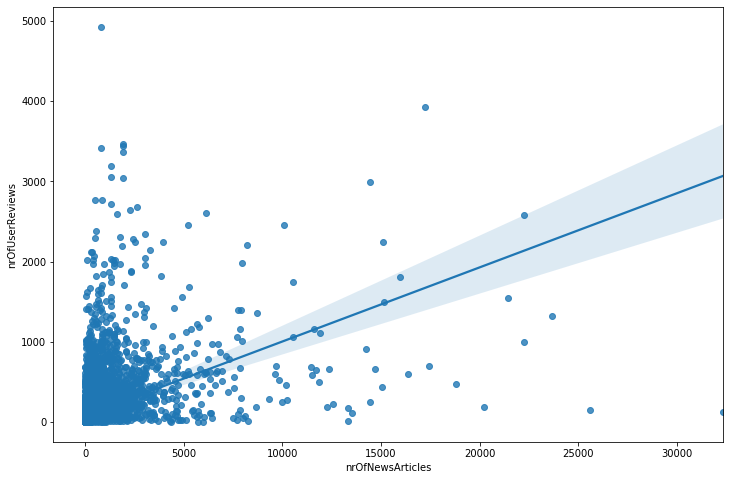

In [53]:
# Assumption:-  number of news articles will be in positive correlation with number of user reviews
plt.figure(figsize=(12,8))
sns.regplot(x="nrOfNewsArticles",y= "nrOfUserReviews",data = imdb)

# We can see that As number of news articles increasing number of User reviews also increasing as it is indicating the buzz around movie

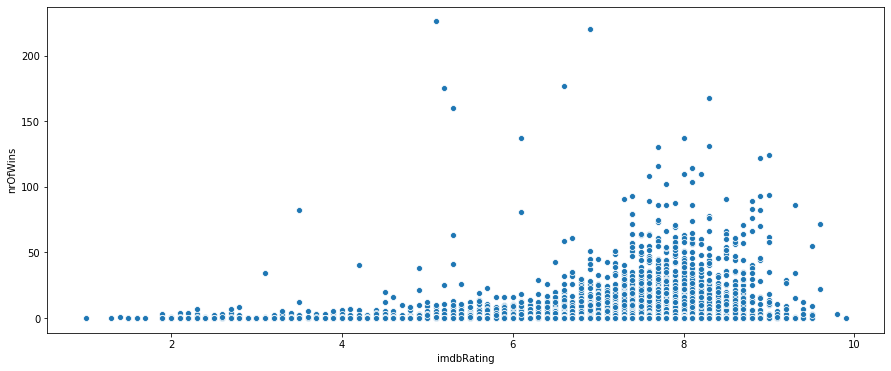

In [54]:
# Relation between imdb rating and number of wins
plt.figure(figsize=(15,6))
sns.scatterplot(x="imdbRating",y="nrOfWins",data=imdb)

# it is expected that as Rating increses number of wins will be more.Except some outliers we can see that as rating increases Number of wins are more

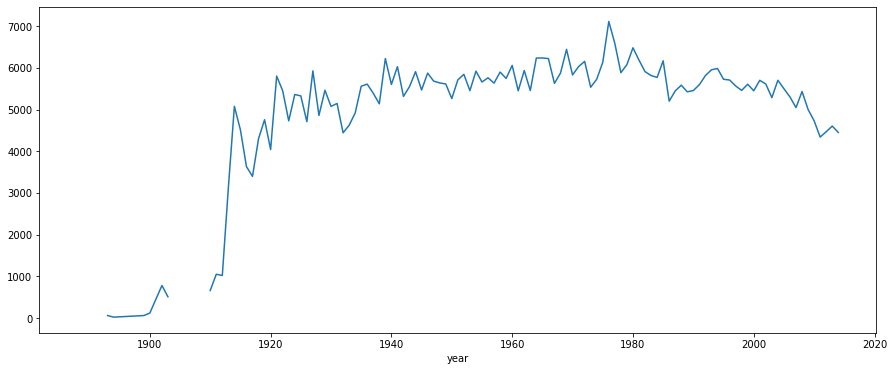

In [55]:
plt.figure(figsize=(15,6))
imdb.groupby("year")["duration"].mean().plot()

# average Duration increased over years

In [56]:
imdb["generes"] = imdb[generes].apply(lambda x:tuple(x.index[x!=0]),axis = 1)

In [57]:
year_genere = imdb[["year","generes","imdbRating"]].explode("generes")

In [58]:
year_genere.groupby(["generes"])["imdbRating"].mean().sort_values(ascending = False).head()

generes
History      7.315564
War          7.297246
FilmNoir     7.294211
Biography    7.243092
Animation    7.189548
Name: imdbRating, dtype: float64

History,War,FilmNoir,Biography,Animation are the top 5 generes with highest average imdb rating

In [59]:
wins_genere = imdb[["nrOfWins","generes"]]

In [60]:
wins_genere = wins_genere.explode("generes")
wins_genere.groupby("generes")["nrOfWins"].sum().sort_values(ascending = False).head(10)

generes
Drama        32052
Comedy       12610
Romance       8086
Crime         6975
Adventure     5561
Action        5287
Thriller      4660
Biography     4476
Mystery       3872
History       3227
Name: nrOfWins, dtype: int64

above are the top 10 Generes with highest number of wins

In [61]:
review_generes = imdb[["nrOfUserReviews","generes"]]

In [62]:
review_generes = review_generes.explode("generes")
review_generes.groupby("generes")["nrOfUserReviews"].sum().sort_values(ascending=False).head()

generes
Drama        726348
Action       426631
Comedy       394650
Adventure    340645
Thriller     296248
Name: nrOfUserReviews, dtype: int64

Above are the generes which are highly reviewed

# Analysis on IMDB movies meta data

In [63]:
imdb_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [64]:
""" As number of records are very less instead of dropping null values over data set 
Just removing records where budget and Gross are NUll. will remove any further records as per requirement"""

imdb_new.dropna(subset=["gross","budget"],inplace=True)

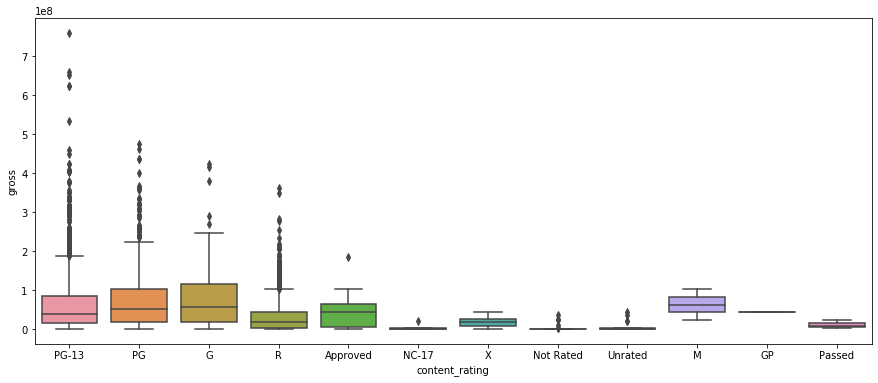

In [65]:
# Which Genere movies are generating highest revenue
plt.figure(figsize=(15,6))
sns.boxplot(x="content_rating",y="gross",data=imdb_new)

PG-13 movies are generating Highest revenue as per data. NC-17 movies are generating very less revenue. But this insight is not credible as data is very less and most of the data belongs to R and PG-13

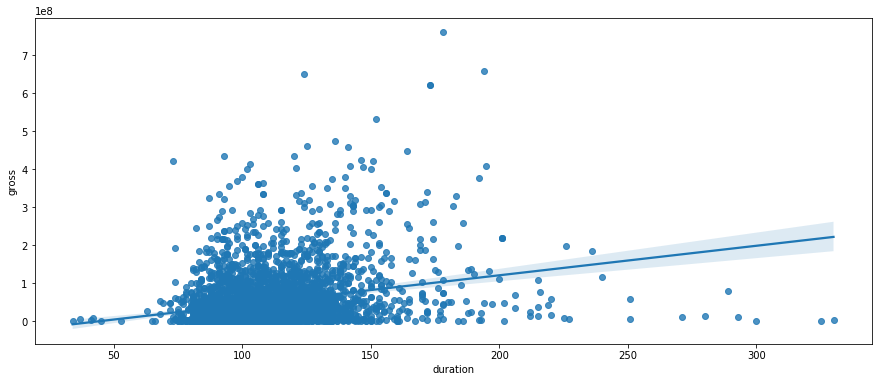

In [66]:
plt.figure(figsize=(15,6))
sns.regplot(x="duration",y="gross",data=imdb_new)

There is a positive correlation between Duration and gross

In [67]:
# Top 10 directors according to average gross generated by their movies
imdb_new.groupby("director_name")["gross"].mean().sort_values(ascending=False).head(10)


director_name
Joss Whedon        4.327217e+08
Lee Unkrich        4.149845e+08
Chris Buck         4.007366e+08
Tim Miller         3.630243e+08
George Lucas       3.482837e+08
Kyle Balda         3.360296e+08
Colin Trevorrow    3.280925e+08
Yarrow Cheney      3.235055e+08
Pete Docter        3.131138e+08
Pierre Coffin      3.097756e+08
Name: gross, dtype: float64

In [68]:
# Top 10 actors according to average gross generated by their movies
imdb_new.groupby("actor_1_name")["gross"].mean().sort_values(ascending=False).head(10)


actor_1_name
Rupert Everett       4.364710e+08
Wayne Knight         3.567840e+08
Albert Finney        3.043603e+08
Steve Bastoni        2.814925e+08
Phaldut Sharma       2.740850e+08
Kathleen Freeman     2.676520e+08
Glenn Morshower      2.618489e+08
Catherine Dyer       2.559504e+08
John Ratzenberger    2.536131e+08
Tim Holmes           2.349031e+08
Name: gross, dtype: float64

In [69]:
# imdb_new["genres"] = imdb_new["genres"].str.split("|")
# gener_gross = imdb_new[["generes","gross"]].explode("generes").groupby("generes")["gross"].mean()

In [70]:
imdb_new["genres"]  = imdb_new["genres"].str.split("|")

In [71]:
imdb_new[["genres","gross"]].explode("genres").groupby("genres")["gross"].mean().sort_values(ascending=False).head(5)

genres
Animation    1.083622e+08
Adventure    9.979846e+07
Family       9.133850e+07
Fantasy      8.669445e+07
Sci-Fi       8.352717e+07
Name: gross, dtype: float64

above are top 5 generes with Highest average gross

In [72]:
imdb_new[["genres","budget"]].explode("genres").groupby("genres")["budget"].mean().sort_values(ascending=False).head(5)

genres
Animation    1.074231e+08
Sci-Fi       9.826242e+07
Adventure    8.627100e+07
Action       7.181674e+07
Family       6.986866e+07
Name: budget, dtype: float64

above are the top 5 geners which need more budget to make. From avove we can observe that Animation movies needs more budget to make and they are generating more revenue. sci-fi movies average budget is more than average gross.

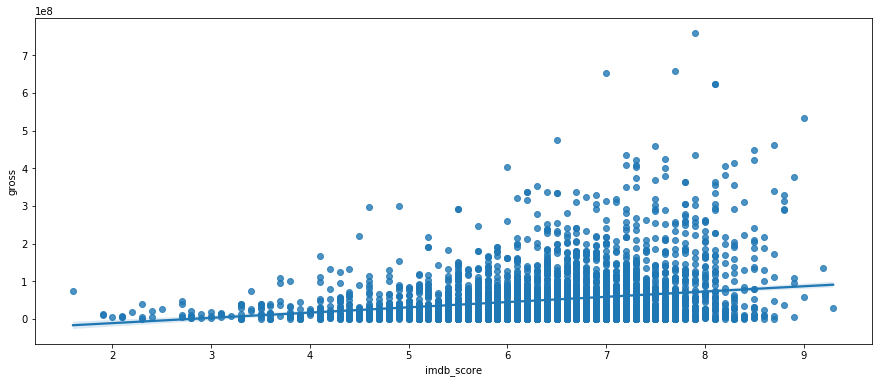

In [73]:
plt.figure(figsize=(15,6))
sns.regplot(x="imdb_score",y="gross",data=imdb_new)

It is expected that movies with high rating tends to generate High revenue